# Problem 1



In [2]:
import sklearn.datasets as datasets
import numpy as np

dataset = datasets.load_breast_cancer()

1. (5 points) Implement κ-means yourself. Your function should take in an array containing a dataset and a value of κ, and return the cluster centroids along with the cluster assignment for each data point. You may choose the initialization heuristic of your choice among the two we saw in class. Hand-in the code for full credit. For this question, you should not rely on any library other than numPy in Python

In [3]:
def k_means(dataset: np.ndarray, k: int):
  m = dataset.shape[0]
  centroids = dataset[np.random.choice(m, size=k, replace=False)]
  prev_centroids = np.zeros((k, 30))
  assignments = [[] for i in range(k)]
  
  while not np.allclose(prev_centroids, centroids):
    # Cluster Assignment
    assignments = [[] for i in range(k)]
    for i, point in enumerate(dataset):
      dists = [np.linalg.norm(point - centroid) for centroid in centroids]
      centroid_index = np.argmin(dists)
      assignments[centroid_index].append(point)

    # Centroid Assignment
    prev_centroids = np.copy(centroids)
    for i, cluster in enumerate(assignments):
      points = np.array(cluster)
      avg = np.average(points, axis=0)
      centroids[i] = avg
  return centroids, assignments

2. Run the κ-means algorithm for values of κ varying between 2 and 7, at increments of 1. Justify in your answer which data you passed as the input to the κ-means algorithm.

In [33]:
for i in range(2, 8):
  k_means(dataset.data, i)
# I chose to pass the entire dataset because it was available to me

3. (2 points) Plot the distortion achieved by κ-means for values of κ varying between 2 and 7, at increments of 1. Hand-in the code and figure output for full credit. For this question, you may rely on plotting libraries such as matplotlib.

Text(0, 0.5, 'Distortion')

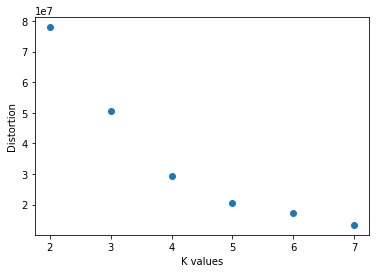

In [7]:
import matplotlib.pyplot as plt

def j(centroids, assignments):
  total = 0.0
  for i, centroid in enumerate(centroids):
    total += np.sum(np.square(assignments[i] - centroid))
  return total

distortions = np.zeros((6))
ks = np.arange(2, 8)
for i in ks:
  centroids, assignments = k_means(dataset.data, i)
  distortions[i-2] = j(centroids, assignments)

plt.scatter(ks, distortions)
plt.xlabel("K values")
plt.ylabel("Distortion")

4. (1 point) If you had to pick one value of κ, which value would you pick? Justify your choice.

From the plot in question 3, we observe that k=7 achieves the lowest distortion. However, we know that the features are meant to predict cancer diagnoses: a binary classification. Therefore, it makes most sense to use k=2 to cluster the data into 2 categories (cancer vs no cancer).

# Problem 2 - Lack of optimality of κ-means

1. (3 points) Construct an analytical demonstration that κ-means might converge to a solution that is not globally optimal. Hint: consider the case where κ = 2 and the dataset is made up of 4 points in R as follows: x(1) = 1, x(2) = 2, x(3) = 3, x(4) = 4. Initialize κ-means with the centroids μ_1 = 2 and μ_2 = 4. Note: you may assume that if a point x(i) is equally distant to multiple centroids μ_k , the point will be assigned to the centroid whose index is smallest, i.e., k with the smallest value for k ∈ argmin_k ||x(i) − μ_k||^2



In the case described, observe that the initial cluster assignments will be

1. μ_1: x(1), x(2), x(3)
2. μ_1: x(4)

From these clusters, the new centroids will become

1. μ_1: 2
2. μ_1: 4

However, note that these are the original centroids so the algorithm will stop, having converged.

Calculating the distortion for this example:

∑||x(i) − μ_k||^2 = 0 + 1 + 0 + 1 = 2

If instead we used the centroids

1. μ_1: 1.5
2. μ_1: 3.5

with corresponding assignments

1. μ_1: x(1), x(2)
2. μ_1: x(3), x(4)

We get the distortion

∑||x(i) − μ_k||^2 = 0.5^2 + 0.5^2 + 0.5^2 + 0.5^2 = 1

Which is clearly more optimal